In [ ]:
#pie chart
#doughnut

In [1]:
import numpy as np,pandas as pd,os

In [2]:
ball = pd.read_excel("D:\Manipal Pro learn\Term1\EDA\Dataset\IPL Data\Ball_by_Ball.xlsx")
match = pd.read_excel("D:\Manipal Pro learn\Term1\EDA\Dataset\IPL Data\Match.xlsx")
player = pd.read_excel("D:\Manipal Pro learn\Term1\EDA\Dataset\IPL Data\Player.xlsx")
season = pd.read_excel("D:\Manipal Pro learn\Term1\EDA\Dataset\IPL Data\Season.xlsx")
team = pd.read_excel("D:\Manipal Pro learn\Term1\EDA\Dataset\IPL Data\Team.xlsx")
player_match = pd.read_excel("D:\Manipal Pro learn\Term1\EDA\Dataset\IPL Data\Player_Match.xlsx")

In [4]:
#top 3 batsmen
batsman_score = ball[['Striker_Id','Batsman_Scored']].groupby('Striker_Id').sum().reset_index()
batsman_score = pd.merge(player,batsman_score,how='left',left_on='Player_Id',right_on='Striker_Id')
batsman_score[['Player_Name','Batsman_Scored']].sort_values(by='Batsman_Scored',ascending=False).head(3)

,Player_Name,Batsman_Scored
20,SK Raina,4106.0
7,V Kohli,4105.0
56,RG Sharma,3874.0


In [3]:
#top 10 bowler based on extras
bowler_extras = ball[ball['Extra_Runs']!=' '].groupby('Bowler_Id')['Extra_Runs'].sum().reset_index()
top_bowler_extras = pd.merge(player,bowler_extras,how='left',left_on='Player_Id',right_on='Bowler_Id')
top_bowler_extras.sort_values(by='Extra_Runs',ascending=False).head(10)

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7,Bowler_Id,Extra_Runs
193,194,SL Malinga,1983-08-28,Right_Hand,Right-arm fast,Sri Lanka,0,NaN,194.0,204.0
13,14,P Kumar,1986-10-02,Right_Hand,Right-arm medium,India,0,NaN,14.0,169.0
60,61,RP Singh,1985-12-06,Right_Hand,Left-arm fast-medium,India,0,NaN,61.0,152.0
31,32,SR Watson,1981-06-17,Right_Hand,Right-arm fast-medium,Australia,0,NaN,32.0,147.0
93,94,DW Steyn,1983-06-27,Right_Hand,Right-arm fast,South Africa,0,NaN,94.0,141.0
83,84,I Sharma,1988-09-02,Right_Hand,Right-arm fast-medium,India,0,NaN,84.0,140.0
49,50,Harbhajan Singh,1980-07-03,Right_Hand,Right-arm offbreak,India,0,NaN,50.0,132.0
14,15,Z Khan,1978-10-07,Right_Hand,Left-arm fast-medium,India,0,NaN,15.0,128.0
108,109,JA Morkel,1981-06-10,Left_Hand,Right-arm medium-fast,South Africa,0,NaN,109.0,122.0
70,71,DJ Bravo,1983-10-07,Right_Hand,Right-arm medium-fast,West Indies,0,NaN,71.0,120.0


In [5]:
#Top3 batsman based on centuries
batsman_score_match = ball.groupby(['Striker_Id','Match_Id'])['Batsman_Scored'].sum().reset_index()
batsman_score_centuries = batsman_score_match[batsman_score_match['Batsman_Scored'] >  99 ]
batsman_score_centuries = batsman_score_centuries.groupby('Striker_Id')['Batsman_Scored'].count().reset_index()
highest_centuries = pd.merge(player,batsman_score_centuries,how='left',left_on='Player_Id',right_on='Striker_Id')
highest_centuries.sort_values(by = 'Batsman_Scored',ascending=False).head(3)

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7,Striker_Id,Batsman_Scored
161,162,CH Gayle,1979-09-21,Left_Hand,Right-arm offbreak,West Indies,0,NaN,162.0,5.0
7,8,V Kohli,1988-11-05,Right_Hand,Right-arm medium,India,0,NaN,8.0,4.0
109,110,AB de Villiers,1984-02-17,Right_Hand,Right-arm medium,South Africa,0,NaN,110.0,3.0


In [7]:
#Are right handed batsman dominating IPL?
runs_player = ball.groupby('Striker_Id')['Batsman_Scored'].sum().reset_index()
highest_runs = pd.merge(player,runs_player,how='left',left_on='Player_Id',right_on='Striker_Id')
Batting_hand = highest_runs.groupby('Batting_Hand')['Batsman_Scored'].sum().reset_index()
player_hand = player.groupby('Batting_Hand')['Player_Id'].count().reset_index()
Batting_hand.insert(1,'No of players',player_hand['Player_Id'])
Batting_hand['Average Score'] = Batting_hand['Batsman_Scored'] / Batting_hand['No of players'] 
Batting_hand

,Batting_Hand,No of players,Batsman_Scored,Average Score
0,Left_Hand,126,54462.0,432.238095
1,Right_Hand,345,111488.0,323.153623


In [15]:
#Decision after winning toss in pie chart
Toss = match.groupby(['Toss_Decision']).size().reset_index()
Toss = Toss.rename(columns={0:'No. of matches'})
Toss

,Toss_Decision,No. of matches
0,bat,262
1,field,315


In [16]:
from matplotlib import pyplot as plt

([<matplotlib.patches.Wedge at 0x18c939b20b8>,
 [Text(0.05751377789415624, 0.3958436122414276, 'bat'),
  Text(-0.12940591687335506, -0.8906481396590723, 'field')],
 [Text(0.1437844447353906, 0.989609030603569, '45.41%'),
  Text(-0.2156765281222584, -1.4844135660984539, '54.59%')])

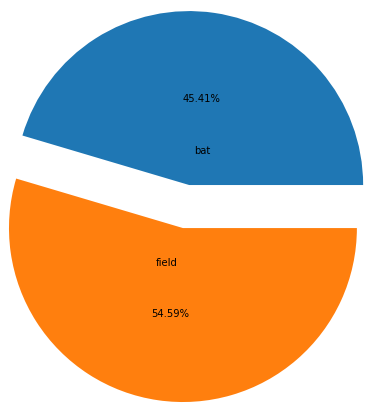

In [24]:
plt.pie(Toss['No. of matches'],labels= Toss['Toss_Decision'],autopct="%.2f%%",
        radius=2,labeldistance=0.2,pctdistance=0.5,explode=(0,0.5))


([<matplotlib.patches.Wedge at 0x18c93df56d8>,
 [Text(-0.2126612232898082, 1.0792475175365854, 'indian'),
  Text(0.21266112224336153, -1.0792475374473616, 'foreign')],
 [Text(-0.1159970308853499, 0.5886804641108647, '56.19%'),
  Text(0.11599697576910628, -0.5886804749712881, '43.81%')])

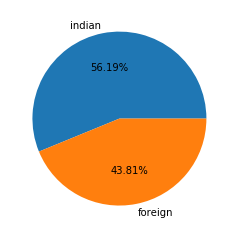

In [40]:
# Contribution of foreign players

batsman_score_match = ball.groupby(['Striker_Id'])['Batsman_Scored'].sum().reset_index()
batsman_score  = pd.merge(batsman_score_match,player,left_on='Striker_Id',right_on='Player_Id')
Total_score = batsman_score[batsman_score['Country'] == 'India']['Batsman_Scored'].sum()
foreign_player_score = batsman_score[batsman_score['Country'] != 'India']['Batsman_Scored'].sum()
Foreign_score = pd.DataFrame({ 'Player_type' : ['indian','foreign'] ,
               'score' : [Total_score,foreign_player_score]
})
plt.pie(Foreign_score['score'],labels= Foreign_score['Player_type'],autopct='%.2f%%')

([<matplotlib.patches.Wedge at 0x18c957280b8>,
 [Text(1.4938856526280466, 3.275409235022713, 'Australia'),
  Text(-2.2171384480387872, 2.444237529829734, 'Bangladesh'),
  Text(-2.555243456446703, 2.0882363080567075, 'England'),
  Text(-2.823808706870012, 1.7076605010964894, 'Netherlands'),
  Text(-3.170073786046859, 0.9168599625998143, 'New Zealand'),
  Text(-3.299650058602942, -0.04805716139772081, 'Pakistan'),
  Text(-2.4551092248512183, -2.632952467108066, 'South Africa'),
  Text(0.9866342663652371, -3.149055862387, 'Sri Lanka'),
  Text(3.1817157506460476, -1.684246087153198, 'West Indies'),
  Text(3.2999970390389586, -0.004420671228019678, 'Zimbabwea')],
 [Text(0.8714332973663604, 1.9106553870965823, '36.38%'),
  Text(-1.209348244384793, 1.3332204708162183, '0.69%'),
  Text(-1.3937691580618377, 1.1390379862127493, '4.05%'),
  Text(-1.54025929465637, 0.9314511824162668, '0.45%'),
  Text(-1.7291311560255593, 0.5001054341453531, '7.90%'),
  Text(-1.7998091228743316, -0.026212997126029

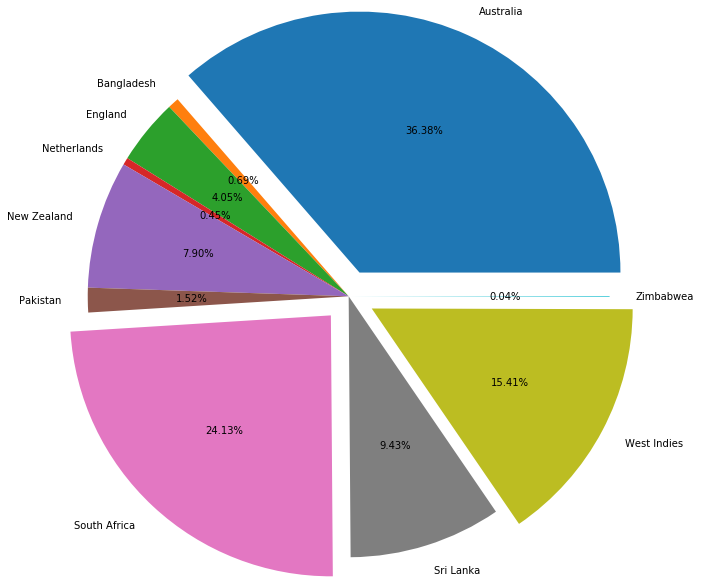

In [63]:
# Contribution of foreign players country-wise

batsman_score_match = ball.groupby(['Striker_Id'])['Batsman_Scored'].sum().reset_index()
batsman_score  = pd.merge(batsman_score_match,player,left_on='Striker_Id',right_on='Player_Id')
foreign_player_score = batsman_score[batsman_score['Country'] != 'India']
foreign_country_score = foreign_player_score.groupby('Country')['Batsman_Scored'].sum().reset_index()

plt.pie(foreign_country_score['Batsman_Scored'],labels=foreign_country_score['Country'],autopct="%.2f%%",
       radius = 3,explode=(0.3,0,0,0,0,0,0.3,0,0.3,0))

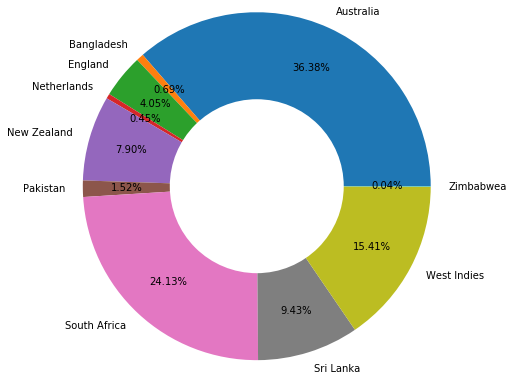

In [70]:
#in doughnut cart

#create a small circle inside pie chart to make doughnut

plt.pie(foreign_country_score['Batsman_Scored'],labels=foreign_country_score['Country'],autopct="%.2f%%",radius=2
       ,pctdistance=0.75)

centre_cirrcle = plt.Circle((0,0),1,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_cirrcle)

In [ ]:
Striker_Id
ball[]